In [10]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [11]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [12]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 50
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.STATIC_FACTOR_MODEL.value(
    factor_cov_estimator=CovEstimators.HISTORICAL.value(),
    residual_cov_estimator=CovEstimators.DIAG_HISTORICAL.value(),
    factors_selection=["spx"],
)

In [13]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [14]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [12:17<00:00,  2.61s/it]


StrategyStatistics:
* final_nav = 4.161522
* geom_avg_total_r = 0.077880
* geom_avg_xs_r = 0.070101
* std_xs_r = 0.163955
* min_xs_r = -0.083882
* max_xs_r = 0.094412
* skew = 0.100128
* kurtosis = 8.560538
* max_dd = -0.282428
* sharpe = 0.427562
* alpha_buy_hold = 0.000308
* tracking_error_buy_hold = 0.222348
* ir_buy_hold = 0.001385
* factor_loadings = {'low_risk': 1.0109773309421934, 'momentum': -0.12453907081318363, 'quality': 0.10814682885889111, 'size': 0.0056544561628860575, 'value': -0.3198759988030053, 'spx': 0.668033898483368}
* alpha_benchmark = 0.001548
* alpha_benchmark_pvalue = 0.753784
* tracking_error_benchmark = 0.120653
* ir_benchmark = 0.012834
* ttest_pval = 0.560714
* levene_pval = 0.000000
* timing_ability_coef = -0.035437
* timing_ability_pval = 0.152231

In [15]:
result.std_xs_r, result.sharpe

(0.16395491747135477, 0.42756221780965276)

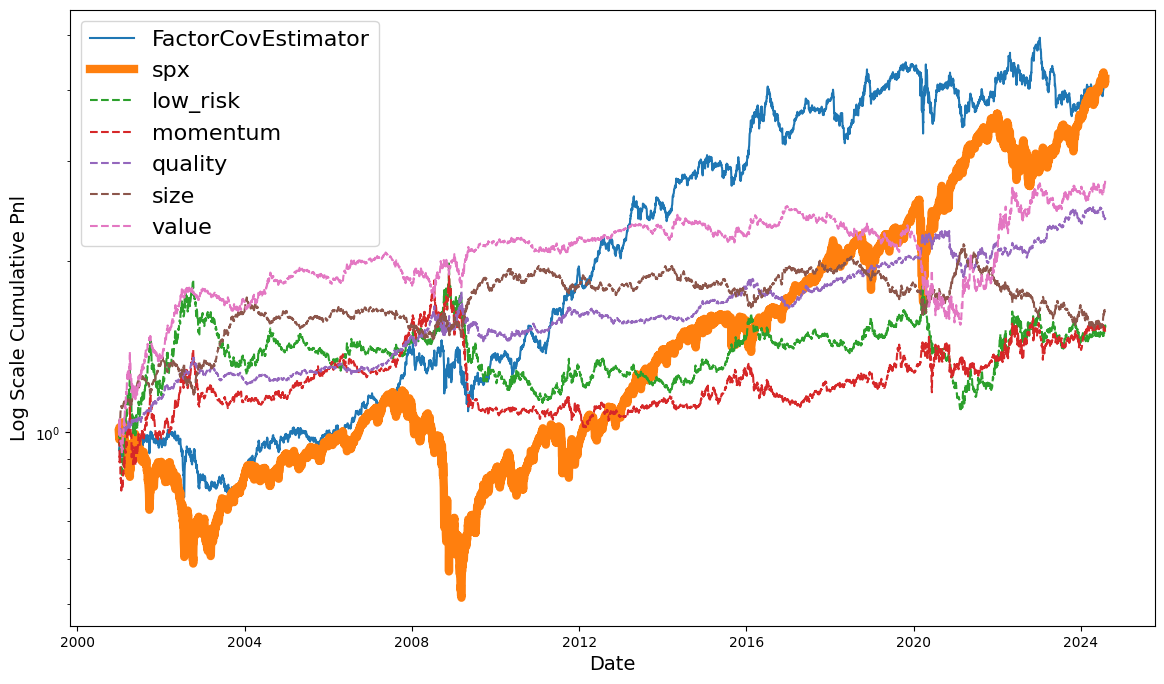

In [16]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

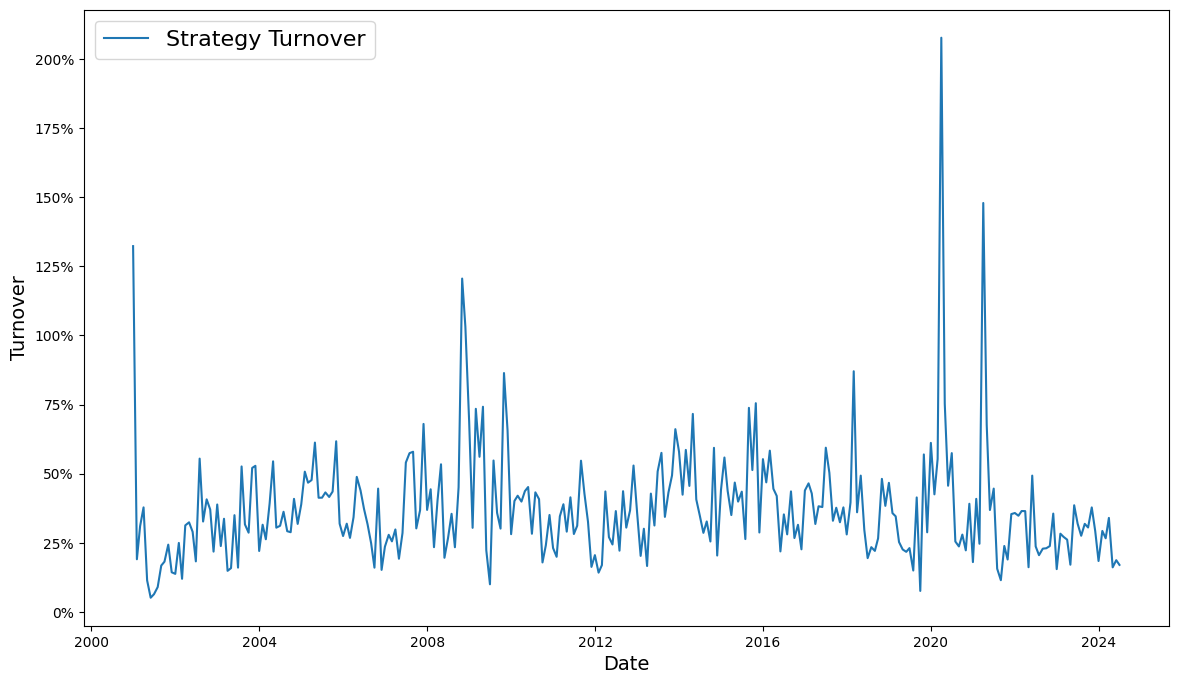

In [17]:
runner.plot_turnover()

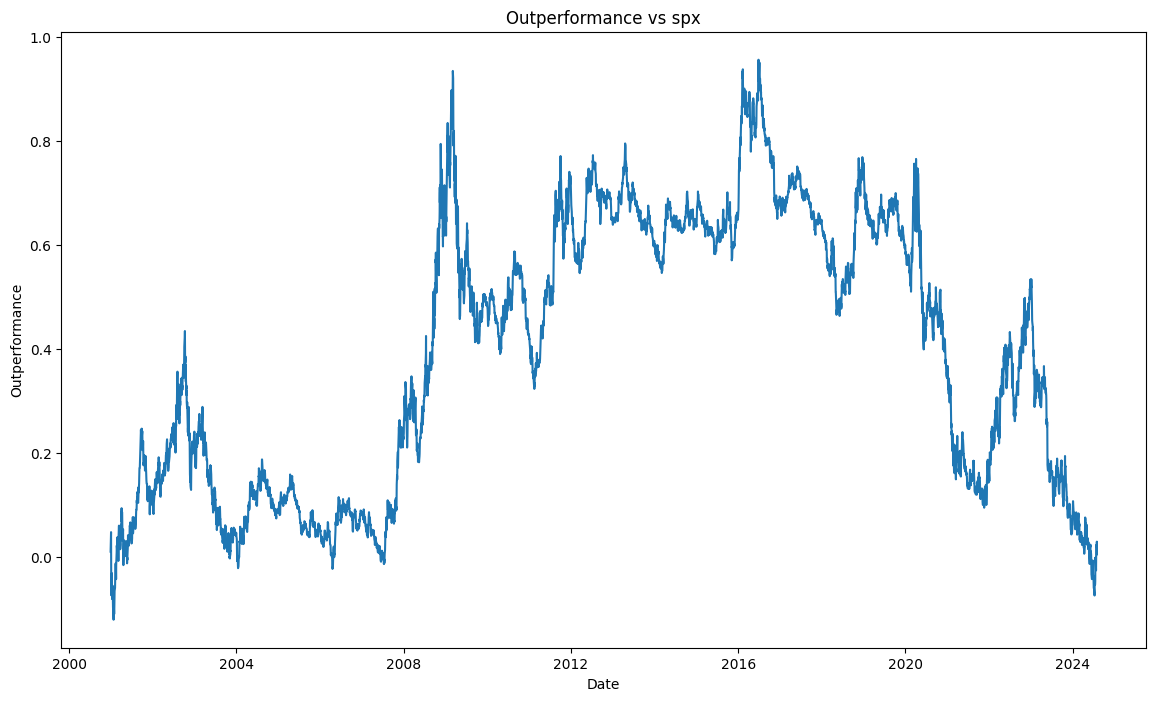

In [18]:
runner.plot_outperformance(mkt_only=True)

In [19]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")